### Library

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns
import plotly.express as px
import math

### Reading, exploring and cleaning the data 

In [6]:
df = pd.read_csv('ikea.csv')

In [7]:
df.shape

(3694, 14)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3694 entries, 0 to 3693
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         3694 non-null   int64  
 1   item_id            3694 non-null   int64  
 2   name               3694 non-null   object 
 3   category           3694 non-null   object 
 4   price              3694 non-null   float64
 5   old_price          3694 non-null   object 
 6   sellable_online    3694 non-null   bool   
 7   link               3694 non-null   object 
 8   other_colors       3694 non-null   object 
 9   short_description  3694 non-null   object 
 10  designer           3694 non-null   object 
 11  depth              2231 non-null   float64
 12  height             2706 non-null   float64
 13  width              3105 non-null   float64
dtypes: bool(1), float64(4), int64(2), object(7)
memory usage: 378.9+ KB


In [9]:
df.isna().sum().sort_values(ascending=False)

depth                1463
height                988
width                 589
Unnamed: 0              0
item_id                 0
name                    0
category                0
price                   0
old_price               0
sellable_online         0
link                    0
other_colors            0
short_description       0
designer                0
dtype: int64

In [10]:
df.head(10)

,Unnamed: 0,item_id,name,category,price,old_price,sellable_online,link,other_colors,short_description,designer,depth,height,width
0,0,90420332,FREKVENS,Bar furniture,265.0,No old price,True,https://www.ikea.com/sa/en/p/frekvens-bar-tabl...,No,"Bar table, in/outdoor, 51x51 cm",Nicholai Wiig Hansen,NaN,99.0,51.0
1,1,368814,NORDVIKEN,Bar furniture,995.0,No old price,False,https://www.ikea.com/sa/en/p/nordviken-bar-tab...,No,"Bar table, 140x80 cm",Francis Cayouette,NaN,105.0,80.0
2,2,9333523,NORDVIKEN / NORDVIKEN,Bar furniture,2095.0,No old price,False,https://www.ikea.com/sa/en/p/nordviken-nordvik...,No,Bar table and 4 bar stools,Francis Cayouette,NaN,NaN,NaN
3,3,80155205,STIG,Bar furniture,69.0,No old price,True,https://www.ikea.com/sa/en/p/stig-bar-stool-wi...,Yes,"Bar stool with backrest, 74 cm",Henrik Preutz,50.0,100.0,60.0
4,4,30180504,NORBERG,Bar furniture,225.0,No old price,True,https://www.ikea.com/sa/en/p/norberg-wall-moun...,No,"Wall-mounted drop-leaf table, ...",Marcus Arvonen,60.0,43.0,74.0
5,5,10122647,INGOLF,Bar furniture,345.0,No old price,True,https://www.ikea.com/sa/en/p/ingolf-bar-stool-...,No,"Bar stool with backrest, 63 cm",Carina Bengs,45.0,91.0,40.0
6,6,70404875,FRANKLIN,Bar furniture,129.0,No old price,True,https://www.ikea.com/sa/en/p/franklin-bar-stoo...,No,"Bar stool with backrest, foldable, ...",K Hagberg/M Hagberg,44.0,95.0,50.0
7,7,60155602,DALFRED,Bar furniture,195.0,No old price,True,https://www.ikea.com/sa/en/p/dalfred-bar-stool...,No,"Bar stool, 63-74 cm",Sarah Fager,50.0,NaN,50.0
8,8,50406465,FRANKLIN,Bar furniture,129.0,No old price,True,https://www.ikea.com/sa/en/p/franklin-bar-stoo...,No,"Bar stool with backrest, foldable, ...",K Hagberg/M Hagberg,44.0,95.0,50.0
9,9,69304221,EKEDALEN / EKEDALEN,Bar furniture,2176.0,"SR 2,375",True,https://www.ikea.com/sa/en/p/ekedalen-ekedalen...,No,Bar table and 4 bar stools,Ehlén Johansson,NaN,NaN,NaN


In [12]:
df2 = df.loc[:,['name','category','price','old_price','sellable_online','other_colors','designer']]

In [13]:
df2

,name,category,price,old_price,sellable_online,other_colors,designer
0,FREKVENS,Bar furniture,265.0,No old price,True,No,Nicholai Wiig Hansen
1,NORDVIKEN,Bar furniture,995.0,No old price,False,No,Francis Cayouette
2,NORDVIKEN / NORDVIKEN,Bar furniture,2095.0,No old price,False,No,Francis Cayouette
3,STIG,Bar furniture,69.0,No old price,True,Yes,Henrik Preutz
4,NORBERG,Bar furniture,225.0,No old price,True,No,Marcus Arvonen
...,...,...,...,...,...,...,...
3689,ELVARLI,Wardrobes,750.0,SR 820,True,No,Ehlén Johansson
3690,ELVARLI,Wardrobes,1572.0,"SR 1,755",True,No,Ehlén Johansson
3691,ELVARLI,Wardrobes,924.0,"SR 1,050",True,No,Ehlén Johansson
3692,ELVARLI,Wardrobes,2745.0,"SR 3,130",True,No,Ehlén Johansson


In [14]:
df2.isna().sum()

name               0
category           0
price              0
old_price          0
sellable_online    0
other_colors       0
designer           0
dtype: int64

In [19]:
df2['name'] = df2['name'].apply(lambda x: x.capitalize())

In [20]:
df2

,name,category,price,old_price,sellable_online,other_colors,designer
0,Frekvens,Bar furniture,265.0,No old price,True,No,Nicholai Wiig Hansen
1,Nordviken,Bar furniture,995.0,No old price,False,No,Francis Cayouette
2,Nordviken / nordviken,Bar furniture,2095.0,No old price,False,No,Francis Cayouette
3,Stig,Bar furniture,69.0,No old price,True,Yes,Henrik Preutz
4,Norberg,Bar furniture,225.0,No old price,True,No,Marcus Arvonen
...,...,...,...,...,...,...,...
3689,Elvarli,Wardrobes,750.0,SR 820,True,No,Ehlén Johansson
3690,Elvarli,Wardrobes,1572.0,"SR 1,755",True,No,Ehlén Johansson
3691,Elvarli,Wardrobes,924.0,"SR 1,050",True,No,Ehlén Johansson
3692,Elvarli,Wardrobes,2745.0,"SR 3,130",True,No,Ehlén Johansson


In [22]:
df2['sellable_online'] = np.where(df2['sellable_online'] == True,'Yes','No')

In [23]:
df2

,name,category,price,old_price,sellable_online,other_colors,designer
0,Frekvens,Bar furniture,265.0,No old price,Yes,No,Nicholai Wiig Hansen
1,Nordviken,Bar furniture,995.0,No old price,No,No,Francis Cayouette
2,Nordviken / nordviken,Bar furniture,2095.0,No old price,No,No,Francis Cayouette
3,Stig,Bar furniture,69.0,No old price,Yes,Yes,Henrik Preutz
4,Norberg,Bar furniture,225.0,No old price,Yes,No,Marcus Arvonen
...,...,...,...,...,...,...,...
3689,Elvarli,Wardrobes,750.0,SR 820,Yes,No,Ehlén Johansson
3690,Elvarli,Wardrobes,1572.0,"SR 1,755",Yes,No,Ehlén Johansson
3691,Elvarli,Wardrobes,924.0,"SR 1,050",Yes,No,Ehlén Johansson
3692,Elvarli,Wardrobes,2745.0,"SR 3,130",Yes,No,Ehlén Johansson


In [59]:
for i in df2.columns:
    if i != 'price' and i!='old_price':
        x = df2[i].nunique()
        print(f'distinct values [{i}] = {x}')

distinct values [name] = 607
distinct values [category] = 17
distinct values [sellable_online] = 2
distinct values [other_colors] = 2
distinct values [designer] = 381


In [60]:
df2['category'].unique()

array(['Bar furniture', 'Beds', 'Bookcases & shelving units',
       'Cabinets & cupboards', 'Café furniture', 'Chairs',
       'Chests of drawers & drawer units', "Children's furniture",
       'Nursery furniture', 'Outdoor furniture', 'Room dividers',
       'Sideboards, buffets & console tables', 'Sofas & armchairs',
       'Tables & desks', 'Trolleys', 'TV & media furniture', 'Wardrobes'],
      dtype=object)

### Furniture category count

In [67]:
df2['category'].value_counts().reset_index(name='count')

,index,count
0,Tables & desks,612
1,Bookcases & shelving units,548
2,Chairs,481
3,Sofas & armchairs,428
4,Cabinets & cupboards,292
5,Wardrobes,236
6,Outdoor furniture,216
7,Beds,208
8,TV & media furniture,190
9,Chests of drawers & drawer units,125


Text(0, 0.5, 'Category name')

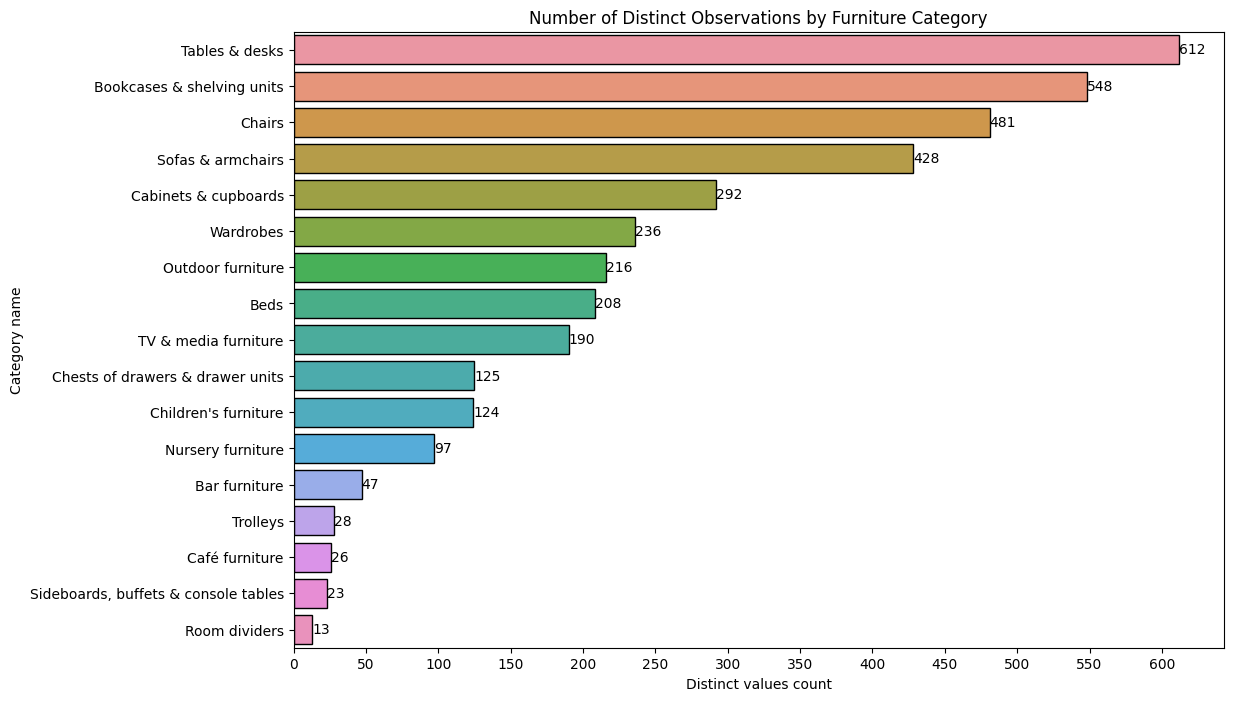

In [79]:
plt.figure(figsize=(12,8))
bar = sns.barplot(data=df2['category'].value_counts().reset_index(name='count'),
y='index',
x='count',
edgecolor='black')
plt.bar_label(bar.containers[0])
plt.gca().xaxis.set_major_locator(ticker.MultipleLocator(50))
plt.title('Number of Distinct Observations by Furniture Category')
plt.xlabel('Distinct values count')
plt.ylabel('Category name')


In [80]:
df2.head(10)

,name,category,price,old_price,sellable_online,other_colors,designer
0,Frekvens,Bar furniture,265.0,No old price,Yes,No,Nicholai Wiig Hansen
1,Nordviken,Bar furniture,995.0,No old price,No,No,Francis Cayouette
2,Nordviken / nordviken,Bar furniture,2095.0,No old price,No,No,Francis Cayouette
3,Stig,Bar furniture,69.0,No old price,Yes,Yes,Henrik Preutz
4,Norberg,Bar furniture,225.0,No old price,Yes,No,Marcus Arvonen
5,Ingolf,Bar furniture,345.0,No old price,Yes,No,Carina Bengs
6,Franklin,Bar furniture,129.0,No old price,Yes,No,K Hagberg/M Hagberg
7,Dalfred,Bar furniture,195.0,No old price,Yes,No,Sarah Fager
8,Franklin,Bar furniture,129.0,No old price,Yes,No,K Hagberg/M Hagberg
9,Ekedalen / ekedalen,Bar furniture,2176.0,"SR 2,375",Yes,No,Ehlén Johansson


In [83]:
df2_price = df2.groupby(['category'])['price'].mean().reset_index()

In [85]:
df2_price['price'] = round(df2_price['price'],2)

In [90]:
df2_price = df2_price.sort_values('price',ascending=False).reset_index(drop=True)

### Average price per furniture category

In [91]:
df2_price

,category,price
0,Wardrobes,2162.14
1,Sofas & armchairs,2004.02
2,Beds,1647.43
3,Tables & desks,1129.40
4,"Sideboards, buffets & console tables",1068.09
5,Chairs,1048.93
6,Room dividers,932.00
7,Outdoor furniture,859.83
8,Cabinets & cupboards,789.02
9,Bar furniture,679.55


Text(0.5, 1.0, 'Average Price by Category')

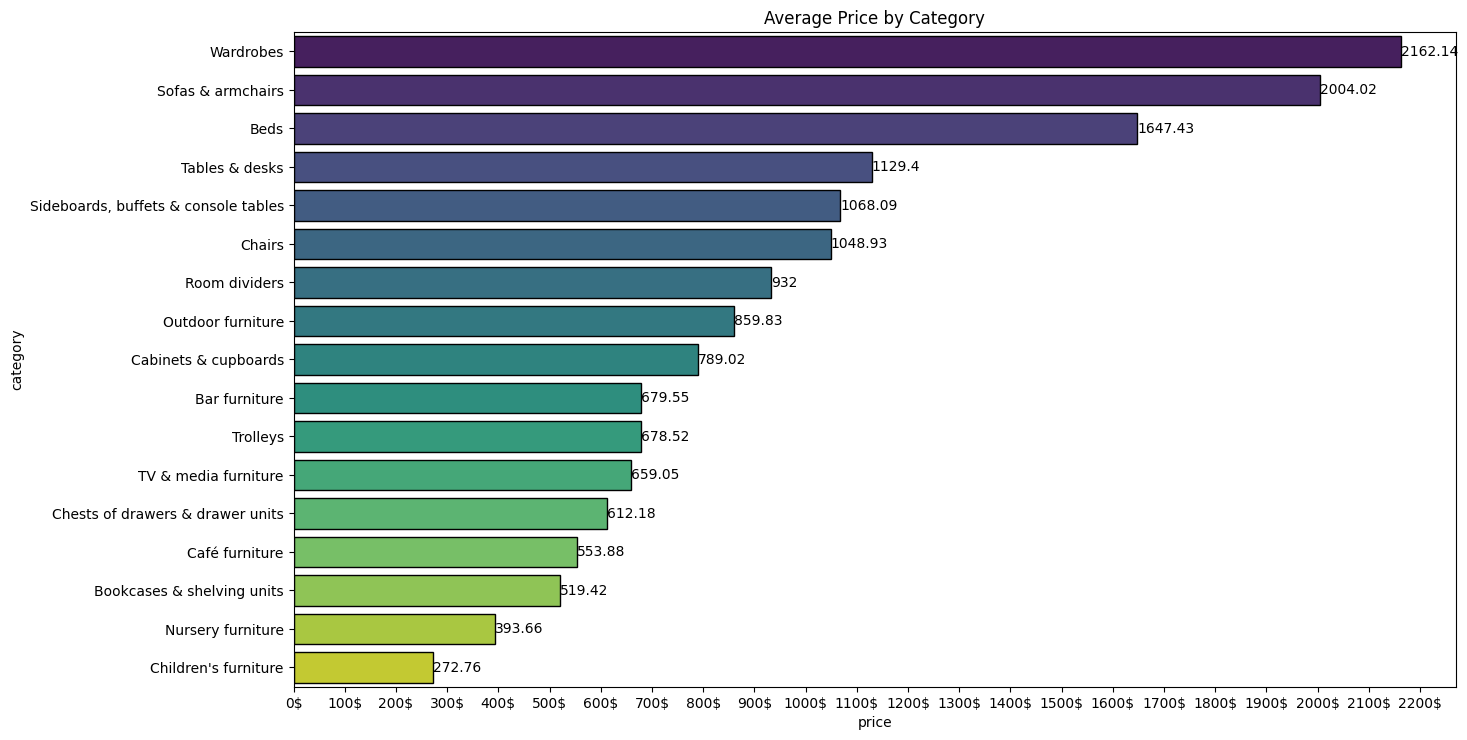

In [106]:
plt.figure(figsize=(15,8.5))
bar = sns.barplot(data=df2_price,
y='category',
x='price',
edgecolor='black',
palette='viridis')
plt.bar_label(bar.containers[0])
plt.gca().xaxis.set_major_locator(ticker.MultipleLocator(100))
plt.gca().xaxis.set_major_formatter(ticker.FormatStrFormatter('%.0f$'))
plt.title('Average Price by Category')

In [113]:
df2_price_px = df2_price.sort_values('price',ascending=True).reset_index(drop=True)

### Average price by furniture category in IKEA - dynamic plot

In [120]:
fig = px.bar(
    data_frame = df2_price_px,
    y='category',
    x='price',
    color='price',
    width=1200,
    height=800,
    color_continuous_scale='bupu'
)
fig.update_layout(
    title = 'Average Price by Category',
    xaxis_title = 'Price',
    yaxis_title = 'Category'
)
fig.show()

In [111]:
df2_price

,category,price
0,Wardrobes,2162.14
1,Sofas & armchairs,2004.02
2,Beds,1647.43
3,Tables & desks,1129.40
4,"Sideboards, buffets & console tables",1068.09
5,Chairs,1048.93
6,Room dividers,932.00
7,Outdoor furniture,859.83
8,Cabinets & cupboards,789.02
9,Bar furniture,679.55


In [121]:
df2.head(10)

,name,category,price,old_price,sellable_online,other_colors,designer
0,Frekvens,Bar furniture,265.0,No old price,Yes,No,Nicholai Wiig Hansen
1,Nordviken,Bar furniture,995.0,No old price,No,No,Francis Cayouette
2,Nordviken / nordviken,Bar furniture,2095.0,No old price,No,No,Francis Cayouette
3,Stig,Bar furniture,69.0,No old price,Yes,Yes,Henrik Preutz
4,Norberg,Bar furniture,225.0,No old price,Yes,No,Marcus Arvonen
5,Ingolf,Bar furniture,345.0,No old price,Yes,No,Carina Bengs
6,Franklin,Bar furniture,129.0,No old price,Yes,No,K Hagberg/M Hagberg
7,Dalfred,Bar furniture,195.0,No old price,Yes,No,Sarah Fager
8,Franklin,Bar furniture,129.0,No old price,Yes,No,K Hagberg/M Hagberg
9,Ekedalen / ekedalen,Bar furniture,2176.0,"SR 2,375",Yes,No,Ehlén Johansson


In [122]:
df2['sellable_online'].value_counts()

Yes    3666
No       28
Name: sellable_online, dtype: int64

In [128]:
df2_design_top = df2['designer'].value_counts().head(10).sort_values(ascending=True).reset_index(name='count')

### Top 10 designers in IKEA

In [129]:
df2_design_top

,index,count
0,Henrik Preutz,70
1,IKEA of Sweden/Ehlén Johansson,70
2,Carina Bengs,75
3,Ehlén Johansson/IKEA of Sweden,75
4,Jon Karlsson,120
5,K Hagberg/M Hagberg,122
6,Ola Wihlborg,134
7,Francis Cayouette,151
8,Ehlén Johansson,161
9,IKEA of Sweden,828


In [133]:
fig = px.bar(
    data_frame = df2_design_top,
    y='index',
    x='count',
    color = 'count',
    color_continuous_scale='Oranges',
    width = 1200,
    height = 800,
    hover_name = 'index'

)
fig.update_layout(
    xaxis_title = 'Number of designed products',
    yaxis_title = 'Designer name',
    title = 'Designed Products Count by Artist'
)